C:\Users\18611\AppData\Local\Temp\ipykernel_5012\4156652716.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_encoded_df["Make_encoded"].fillna(train_df[target].mean(), inplace=True)
C:\Users\18611\AppData\Local\Temp\ipykernel_5012\4156652716.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa


=== Hyperparams: C=0.1, epsilon=0.01, kernel=rbf ===
Validation MSE: 0.0231


val_mse,▁
val_mse,0.0231



=== Hyperparams: C=0.1, epsilon=0.1, kernel=rbf ===
Validation MSE: 0.0258


val_mse,▁
val_mse,0.02584



=== Hyperparams: C=0.1, epsilon=0.5, kernel=rbf ===
Validation MSE: 0.0781


val_mse,▁
val_mse,0.07811



=== Hyperparams: C=1, epsilon=0.01, kernel=rbf ===
Validation MSE: 0.0033


val_mse,▁
val_mse,0.00327



=== Hyperparams: C=1, epsilon=0.1, kernel=rbf ===
Validation MSE: 0.0052


val_mse,▁
val_mse,0.00516



=== Hyperparams: C=1, epsilon=0.5, kernel=rbf ===
Validation MSE: 0.0491


val_mse,▁
val_mse,0.04906



=== Hyperparams: C=10, epsilon=0.01, kernel=rbf ===
Validation MSE: 0.0025


val_mse,▁
val_mse,0.00249



=== Hyperparams: C=10, epsilon=0.1, kernel=rbf ===
Validation MSE: 0.0045


val_mse,▁
val_mse,0.00446



=== Hyperparams: C=10, epsilon=0.5, kernel=rbf ===
Validation MSE: 0.0500


val_mse,▁
val_mse,0.04998



Best hyperparams found: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best val MSE: 0.002490524827523123


Fold 1: Test MSE = 0.0061
Fold 2: Test MSE = 0.0023
Fold 3: Test MSE = 0.0013
Fold 4: Test MSE = 0.0029
Fold 5: Test MSE = 0.0031
Fold 6: Test MSE = 0.0017
Fold 7: Test MSE = 0.0018
Fold 8: Test MSE = 0.0017
Fold 9: Test MSE = 0.0022
Fold 10: Test MSE = 0.0013
Fold 11: Test MSE = 0.0043
Fold 12: Test MSE = 0.0019
Fold 13: Test MSE = 0.0026
Fold 14: Test MSE = 0.0024
Fold 15: Test MSE = 0.0016
Fold 16: Test MSE = 0.0017
Fold 17: Test MSE = 0.0026
Fold 18: Test MSE = 0.0015
Fold 19: Test MSE = 0.0051
Fold 20: Test MSE = 0.0017

Avg Test MSE across folds: 0.0025

Final Test MSE: 8.4916
Final Test R²: 0.9976
Final Test MAE: 1.8821
Final Test MAPE: 0.0075


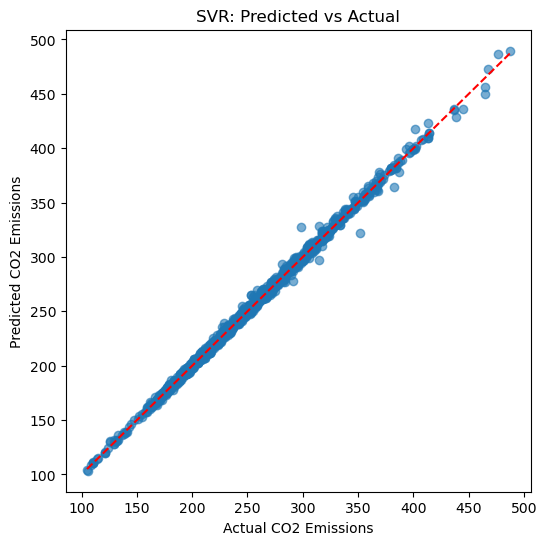

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from itertools import product
import wandb

# Load dataset
train_df = pd.read_csv("Dataset1_train.csv")
test_df = pd.read_csv("Dataset1_test.csv")

# Define numerical features and target variable
numeric_features = [
    "Engine Size(L)", "Cylinders", "Gearbox_Number",
    "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)",
    "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"
]
categorical_features = ["Make"]  # Only encoding `Make`
target = "CO2 Emissions(g/km)"

# -------- Step 1: K-Fold Target Encoding --------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_encoded_df = train_df.copy()

# Target encode Make
train_encoded_df["Make_encoded"] = np.nan
for train_idx, val_idx in kf.split(train_df):
    fold_train = train_df.iloc[train_idx]
    target_mean = fold_train.groupby("Make")[target].mean()
    valid_idx = train_encoded_df.index.intersection(val_idx)
    train_encoded_df.loc[valid_idx, "Make_encoded"] = train_df.loc[valid_idx, "Make"].map(target_mean)

train_encoded_df["Make_encoded"].fillna(train_df[target].mean(), inplace=True)

# Process test set
test_encoded_df = test_df.copy()
overall_mapping = train_df.groupby("Make")[target].mean()
test_encoded_df["Make_encoded"] = test_df["Make"].map(overall_mapping)
test_encoded_df["Make_encoded"].fillna(train_df[target].mean(), inplace=True)

# Drop original `Make` column
train_encoded_df.drop(columns=["Make"], inplace=True)
test_encoded_df.drop(columns=["Make"], inplace=True)

# -------- Step 2: Standardization --------
# Remove 'Gearbox_Number' if it is not in the dataset
selected_features = [feature for feature in numeric_features if feature in train_encoded_df.columns] + ["Make_encoded"] + [
    col for col in train_df.columns if col.startswith(("Model Features_", "Vehicle Class_", "Fuel Type_"))
]

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(train_encoded_df[selected_features])
X_test = scaler_X.transform(test_encoded_df[selected_features])

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(train_encoded_df[target].values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(test_encoded_df[target].values.reshape(-1, 1)).ravel()

# Output shapes of processed data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# -------- Step 3: Standardization --------
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(train_encoded_df[selected_features])
X_test = scaler_X.transform(test_encoded_df[selected_features])

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(train_encoded_df[target].values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(test_encoded_df[target].values.reshape(-1, 1)).ravel()

# -------- Step 4: SVR Hyperparameter Tuning --------
# Define hyperparameter grid
C_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 0.5]
kernel_values = ["rbf"]

best_val_loss = float('inf')
best_hyperparams = None
results = []

# Perform grid search without K-Fold during training
for (C_val, epsilon_val, kernel_val) in product(C_values, epsilon_values, kernel_values):
    # Start a wandb run
    run_id = wandb.util.generate_id()
    wandb.init(
        project="svr-hyperparameter-sweep",
        id=run_id,
        config={
            "C": C_val,
            "epsilon": epsilon_val,
            "kernel": kernel_val
        },
        reinit=True
    )
    
    print(f"\n=== Hyperparams: C={C_val}, epsilon={epsilon_val}, kernel={kernel_val} ===")
    
    # Train SVR model
    model = SVR(C=C_val, epsilon=epsilon_val, kernel=kernel_val)
    model.fit(X_train, y_train)
    
    # Predict on validation set
    val_preds = model.predict(X_test)
    val_mse = mean_squared_error(y_test, val_preds)
    
    # Log validation metrics
    wandb.log({"val_mse": val_mse})
    print(f"Validation MSE: {val_mse:.4f}")
    
    # Keep track of best hyperparameters
    if val_mse < best_val_loss:
        best_val_loss = val_mse
        best_hyperparams = wandb.config
    
    results.append(((C_val, epsilon_val, kernel_val), val_mse))
    wandb.finish()

print("\nBest hyperparams found:", best_hyperparams)
print("Best val MSE:", best_val_loss)

# Train final model with best hyperparameters
wandb.init(project="svr-hyperparameter-sweep", name="final_evaluation",
           config=best_hyperparams, reinit=True)

final_C = best_hyperparams["C"]
final_epsilon = best_hyperparams["epsilon"]
final_kernel = best_hyperparams["kernel"]

best_svr = SVR(C=final_C, epsilon=final_epsilon, kernel=final_kernel)
best_svr.fit(X_train, y_train)

# -------- Step 5: Evaluate on Test Set with K-Fold --------
k_folds = 20
random_state = 42
outer_kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)

fold_metrics = []
for fold_idx, (train_idx, val_idx) in enumerate(outer_kf.split(X_test)):
    X_test_fold = X_test[val_idx]
    y_test_fold = y_test[val_idx]
    
    # Predict on test fold
    fold_preds = best_svr.predict(X_test_fold)
    fold_mse = mean_squared_error(y_test_fold, fold_preds)
    fold_metrics.append(fold_mse)
    
    print(f"Fold {fold_idx+1}: Test MSE = {fold_mse:.4f}")

# Average MSE across test folds
avg_test_mse = np.mean(fold_metrics)
print(f"\nAvg Test MSE across folds: {avg_test_mse:.4f}")

# Inverse transform predictions for final evaluation
y_pred = best_svr.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print(f"\nFinal Test MSE: {mse:.4f}")
print(f"Final Test R²: {r2:.4f}")
print(f"Final Test MAE: {mae:.4f}")
print(f"Final Test MAPE: {mape:.4f}")

wandb.log({"Final Test MSE": mse, "Final Test R2": r2})

# -------- Step 6: Visualization of Predictions --------
plt.figure(figsize=(6, 6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.6)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("SVR: Predicted vs Actual")
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], color="red", linestyle="--")
plt.show()


In [11]:
# Save the output of Best SVR Model 
metrics = pd.DataFrame({
	"Metric": ['MSE', 'R2', 'MAE', 'MAPE'],
	"Test_results": [mse, r2, mae, mape]
})

validation_metrics_table = pd.DataFrame({
    "Metric": ["MSE", "R2", "MAE", "MAPE"],
    **{f"Fold_{i+1}": [mean_squared_error(y_test[val_idx], best_svr.predict(X_test[val_idx])),
                       r2_score(y_test[val_idx], best_svr.predict(X_test[val_idx])),
                       mean_absolute_error(y_test[val_idx], best_svr.predict(X_test[val_idx])),
                       mean_absolute_percentage_error(y_test[val_idx], best_svr.predict(X_test[val_idx]))]
       for i, (train_idx, val_idx) in enumerate(outer_kf.split(X_test))}
})

combined_metrics_table = validation_metrics_table.copy()
combined_metrics_table["Test"] = metrics["Test_results"]

# Save the combined metrics table
combined_metrics_table.to_csv("SVR_combined_metrics.csv", index=False)
combined_metrics_table

,Metric,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,Fold_6,Fold_7,Fold_8,Fold_9,...,Fold_12,Fold_13,Fold_14,Fold_15,Fold_16,Fold_17,Fold_18,Fold_19,Fold_20,Test
0,MSE,0.006122,0.002251,0.001307,0.002917,0.003124,0.001696,0.001832,0.001723,0.002208,...,0.001935,0.002560,0.002431,0.001583,0.001681,0.002564,0.001456,0.005106,0.001734,8.491580
1,R2,0.994621,0.998410,0.998882,0.997060,0.996747,0.998283,0.998285,0.998464,0.997248,...,0.998148,0.997245,0.997653,0.998469,0.998572,0.997656,0.998069,0.993174,0.998259,0.997557
2,MAE,0.042195,0.032779,0.027764,0.036216,0.038675,0.026660,0.030312,0.030443,0.032902,...,0.030354,0.035792,0.031355,0.029418,0.029807,0.031029,0.028355,0.037034,0.030578,1.882133
3,MAPE,3.155545,0.111977,0.533111,8.472747,2.690291,1.708983,3.659107,0.107292,0.163329,...,0.162184,0.107574,0.115811,0.119777,0.082094,0.539663,0.139636,4.268171,0.077726,0.007530
